[0. 0.]
[ 2.22040991 -0.04382995]
[[0.01300189]
 [1.45353408]]
[[0.49690333]
 [1.93557998]]
[0.81371297 0.52163115]
[[0. 1. 0.]
 [2. 1. 2.]]


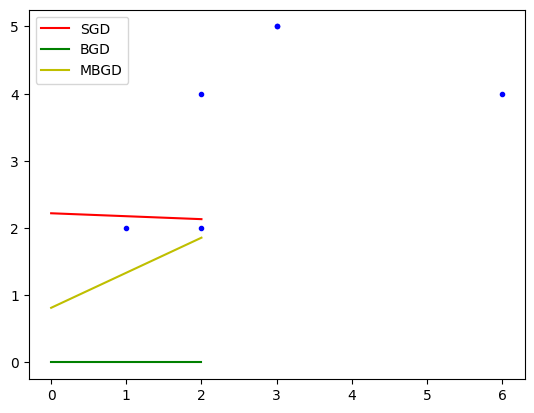

In [8]:
################################Momemtum based gradient descent################################
import numpy as np
import matplotlib.pyplot as plt

def momentum_gd(x,y,learning_rate,n_epoch,gamma,theta):
  m=len(y)
  velocity=np.zeros_like(theta)
  for epoch in range(n_epoch):
    gradient=1/m*x.T.dot(x.dot(theta)-y)
    velocity=gamma*velocity+learning_rate*gradient
    theta=theta-velocity
  return theta

x=np.array([[1,2],[2,6],[3,3]])
y=np.array([2,4,5])
theta=np.zeros(x.shape[1])
print(theta)
learning_rate=0.1
n_epoch=10
gamma=0.9
theta_mom_gd=momentum_gd(x,y,learning_rate,n_epoch,gamma,theta)
print(theta_mom_gd)

################################Adagrad Gradient Descent################################

#genearate random dataset
np.random.seed(42)
x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)

#add bias term
x_b=np.c_[np.ones((100,1)),x]
data=np.c_[x,y,x_b]

#parametrs
learning_rate=0.1
n_epoch=10
epsilon=1e-8

#theta initial
theta=np.random.randn(2,1)
print(theta)

#adagrad specific parameters
gradient_accumulator=np.zeros((2,1))

#adagrad optimizers
for epoch in range(n_epoch):
  gradient=1/len(x_b)*x_b.T.dot(x_b.dot(theta)-y)
  gradient_accumulator+=gradient**2
  adjusted_gradient=gradient/(np.sqrt(gradient_accumulator)+epsilon)
  theta=theta-learning_rate*adjusted_gradient


print(theta)

################################RMSProp_GD################################
import numpy as np

def rmsprop_gd(x, y, learning_rate, n_epoch, beta, theta):
    m = len(y)
    # Initialize the cache to store the squared gradients
    cache = np.zeros_like(theta)

    for epoch in range(n_epoch):
        # Compute the gradient
        gradient = 1/m * x.T.dot(x.dot(theta) - y)

        # Update the cache with the squared gradient
        cache = beta * cache + (1 - beta) * (gradient ** 2)

        # Update the parameters with RMSProp
        theta = theta - (learning_rate / (np.sqrt(cache) + 1e-8)) * gradient

    return theta

# Example data
x = np.array([[1, 2],
              [2, 6],
              [3, 3]])
y = np.array([2, 4, 5])
theta = np.zeros(x.shape[1])

# Hyperparameters
learning_rate = 0.1
n_epoch = 10
beta = 0.9  # decay rate for the moving average of squared gradients

# Run RMSProp GD
theta_rmsprop_gd = rmsprop_gd(x, y, learning_rate, n_epoch, beta, theta)
print(theta_rmsprop_gd)

################################plotting all GD################################
def plot_gd(x,y,theta_mom_gd,theta,theta_rmsprop_gd):
  plt.plot(x,y,'b.')
  x_new=np.array([[0],[2]])
  x_new_b=np.c_[np.ones((2,1)),x_new]
  n_data=np.c_[x_new,x_new_b]
  print(n_data)
  y_pred_sdg=x_new_b.dot(theta_mom_gd)
  y_pred_bgd=x_new_b.dot(theta)
  y_pred_mbgd=x_new_b.dot(theta_rmsprop_gd)
  plt.plot(x_new,y_pred_sdg,'r-',label="SGD")
  plt.plot(x_new,y_pred_bgd,'g-',label="BGD")
  plt.plot(x_new,y_pred_mbgd,'y-',label="MBGD")
  plt.legend(loc="upper left")
  plt.show()


plot_gd(x,y,theta_mom_gd,theta,theta_rmsprop_gd)

###################################################################################################################################